Flight Price Prediction

Problem Statement:
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the database
df=pd.read_excel('Data_Train.xlsx')

In [3]:
#showing dataset
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#checking the sum of null values in the dataset if any
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#checking the values and their counts in the column
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [7]:
#describing the dataset
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
#droping the nan values in the dataset
df.dropna(inplace=True)

In [9]:
#checking the shape of data after dropping nan values
df.shape

(10682, 11)

In [10]:
#again checking the null values in the data
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

<AxesSubplot:>

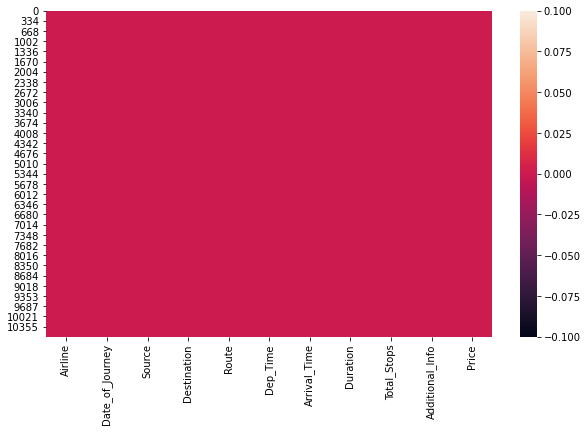

In [11]:
#making the heatmap for the dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
#seprationg the day month year columns from date of journey
df['day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['month']= pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month
df['year']= pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.year

In [13]:
#dropping the date of journey because we separated them
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [14]:
#checking the new head od the dataset
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [15]:
#seprating the departure time column into departure hour and departure minute
df['dep_hour']= pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_minute']= pd.to_datetime(df['Dep_Time']).dt.minute

In [16]:
#dropping the departure time column because we have new 
df.drop(['Dep_Time'],axis=1,inplace=True)

In [17]:
#checking tthe head of new column data
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [18]:
#separating the aarrival hour and arrival minutes from arrval time 
df['Arrival_hour']= pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']= pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
#dropping the column to make usefull dataset
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
#checking the new head od the dataset
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,dep_hour,dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [21]:
#assigning the new column of duration than splitting its data into hour and minutes
duration1 = list(df["Duration"])
for i in range(len(duration1)):
    if (len(duration1[i].split())) != 2:
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"
        else:
            duration1[i] = "0h " + duration1[i]

In [22]:
#splitting the data
duration_hour = []
duration_min =[]
for i in range(len(duration1)):
    duration_hour.append(int(duration1[i].split(sep = "h")[0]))
    duration_min.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

In [23]:
#checking the new head od the dataset
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,dep_hour,dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [24]:
#sepratting the column duaration into duration hour and minutes
df['duration_hour']= duration_hour
df['duration_min']= duration_min

In [25]:
#dropping the duration column because we have new one
df.drop(['Duration'],axis=1,inplace=True)

In [26]:
#checking the new head od the dataset
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,dep_hour,dep_minute,Arrival_hour,Arrival_minute,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


# EDA

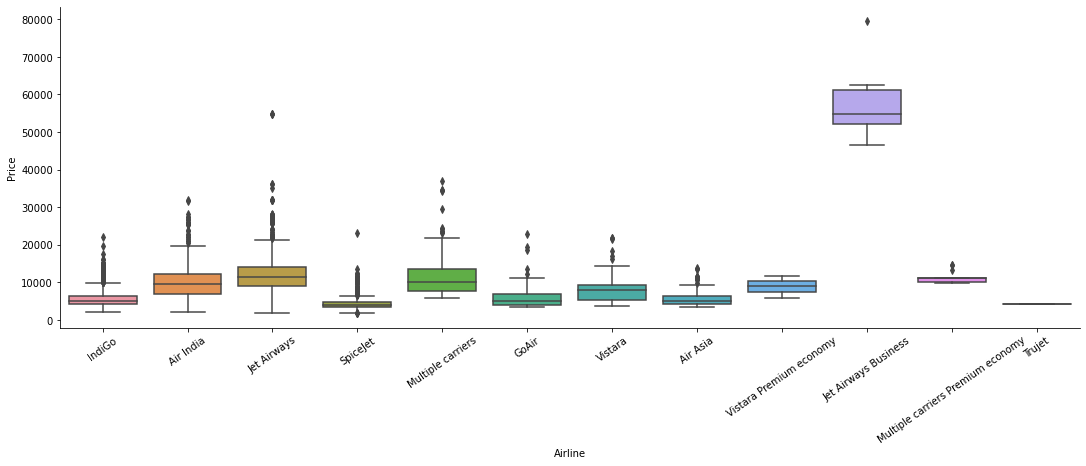

In [27]:
#making the cateogry plot for relatinship betweeen airlines and price
sns.catplot(x='Airline',y='Price',data=df,kind='box',aspect=3)
plt.xticks(rotation=35)
plt.show()

we can see the price of jet airways are very high as compare to others. and others are competitors of each others

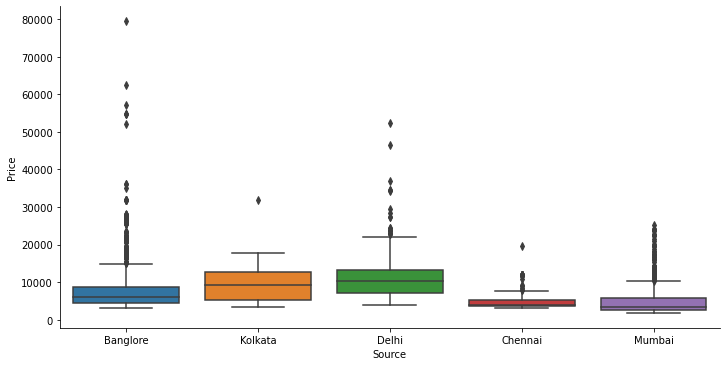

In [28]:
#checking the relation of source with price
sns.catplot(x='Source',y='Price',data=df,kind='box',aspect=2)

all the places have almost same price range only banglor and delhi have some outliers

<function matplotlib.pyplot.show(close=None, block=None)>

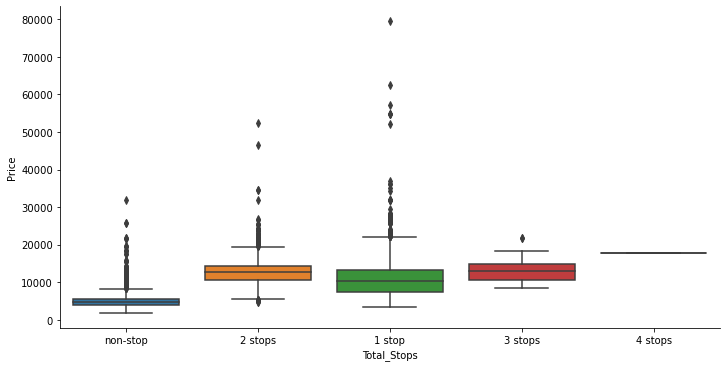

In [29]:
#checking the relationship between total stops nd price
sns.catplot(x='Total_Stops',y='Price',data= df,kind='box',aspect=2)
plt.show

we can see non stop flights are cheaper than other stopable flights.

In [30]:
#getting the dummy data for the column
airline=df[['Airline']]
airline= pd.get_dummies(airline, drop_first= True)

In [31]:
#checking the new head od the dataset
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
#getting the dummy data for the column
source= df[['Source']]
source= pd.get_dummies(source, drop_first=True)

In [33]:
#checking the new head od the dataset
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
#getting the dummy data for the column
destination= df[['Destination']]
destination= pd.get_dummies(destination, drop_first=True)
#checking the new head od the dataset
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [35]:
#dropping the unusefull columns
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [36]:
#checking vaue counts for the column total stop
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
#replacing the variables in the total stop column 
df.replace({'non-stop':0, '1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [38]:
#merging the data into new dataframe
df= pd.concat([df,airline,source,destination],axis=1)

In [39]:
#checking the new head od the dataset
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,day,month,year,dep_hour,dep_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,...,0,0,0,1,0,0,0,0,0,0


In [40]:
#dropping the unecessory data
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [41]:
#checking the new head od the dataset
df.head(2)

,Total_Stops,Price,day,month,year,dep_hour,dep_minute,Arrival_hour,Arrival_minute,duration_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0


# test data

In [42]:
#importing the test file
df1=pd.read_excel('Test_set.xlsx')

In [43]:
#checking the new head of the dataset
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [44]:
#checking for nnull values
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [45]:
#separating the date of journey data into day month year
df1['day'] = pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.day
df1['month']= pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.month
df1['year']= pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.year

In [46]:
#checking the new head of dataset
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019


In [47]:
#dropping tthe unecessory data
df1.drop(['Date_of_Journey'],axis=1,inplace=True)

In [48]:
#separating the data into hour and minutes to make it usefull
df1['departure_hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['departure_minute']=pd.to_datetime(df1['Dep_Time']).dt.minute
#dropping tthe unecessory data
df1.drop(['Dep_Time'],axis=1,inplace=True)

In [49]:
#checking the new head of dataset
df1.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,year,departure_hour,departure_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,2019,6,20


In [50]:
#separating the arrival time column into arrival hour and arrival minutes
df1['arrival_hour']=pd.to_datetime(df1['Arrival_Time']).dt.hour
df1['arrival_minute']=pd.to_datetime(df1['Arrival_Time']).dt.minute

In [51]:
#dropping the unnecessory data
df1.drop(['Arrival_Time'],axis=1,inplace=True)

In [52]:
#checking the new head of dataset
df1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,year,departure_hour,departure_minute,arrival_hour,arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,20


In [53]:
#splitting the variables of duration into minutes and hours 
duration1 = list(df1["Duration"])
for i in range(len(duration1)):
    if (len(duration1[i].split())) != 2:
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"
        else:
            duration1[i] = "0h " + duration1[i]

In [54]:
#spliting the data
duration_hours = []
duration_mins =[]
for i in range(len(duration1)):
    duration_hours.append(int(duration1[i].split(sep = "h")[0]))
    duration_mins.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

In [55]:
#seprating the duration column into hour and minutes
df1['duration_hour']= duration_hours
df1['duration_mins']= duration_mins

In [56]:
#checking the new head of dataset
df1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,year,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_hour,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,20,4,0


In [57]:
#dropping the unnecessory data
df1.drop(['Duration'],axis=1,inplace=True)
df1.drop(['Route'],axis=1, inplace=True)
df1.drop(['Additional_Info'],axis=1, inplace=True)

In [58]:
#checking the new head of dataset
df1.head(2)

,Airline,Source,Destination,Total_Stops,day,month,year,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_hour,duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,6,20,10,20,4,0


In [59]:
#getting the dummy data 
airline=df1['Airline']
airline= pd.get_dummies(airline, drop_first=True)

In [60]:
#checking the new head of dataset
airline.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0


In [61]:
##getting the dummy data
source=df1['Source']
source=pd.get_dummies(source, drop_first=True)

In [62]:
#checking the new head of dataset
source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0


In [63]:
##getting the dummy data for the column destinaton
destination=df1['Destination']
destination=pd.get_dummies(destination, drop_first=True)

In [64]:
#checking the new head of dataset
destination.head(2)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0


In [65]:
#checking the value count for total stops
df1['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [66]:
#replcing the variables of total stop columns
df1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [67]:
#dropping the unnecessory data
df1.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [68]:
#merging the data into new datast
df1=pd.concat([df1,airline,source,destination],axis=1)

In [69]:
#checking the new head of dataset
df1.head(2)

,Total_Stops,day,month,year,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_hour,duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,2019,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
#impoting the library and findingthe z score
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)

[[1.22066609 1.12553455 1.23728754 ... 0.2642058  0.19231927 3.23440464]
 [1.74143186 0.30906781 1.47530729 ... 0.2642058  0.19231927 0.30917591]
 [1.74143186 1.03978296 0.53179604 ... 0.2642058  0.19231927 0.30917591]
 ...
 [1.22066609 0.40296691 1.59110426 ... 0.2642058  0.19231927 0.30917591]
 [1.22066609 0.77218138 1.47530729 ... 0.2642058  0.19231927 3.23440464]
 [1.74143186 0.57809433 0.53179604 ... 0.2642058  0.19231927 0.30917591]]


In [71]:
treshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 10681, 10681, 10681], dtype=int64), array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))
(10682, 31)


In [72]:
#checking for skewness
df_new=df[(z<3).all(axis=1)]

In [73]:
#checking the new shape of dataset
df_new.shape

(0, 31)

In [74]:
#checking the new shape of dataset
df.shape

(10682, 31)

In [75]:
#checking the correlation of variables eith the price
df.corrwith(df['Price'])

Total_Stops                                  0.603897
Price                                        1.000000
day                                         -0.153774
month                                       -0.103643
year                                              NaN
dep_hour                                     0.006799
dep_minute                                  -0.024458
Arrival_hour                                 0.024244
Arrival_minute                              -0.086155
duration_hour                                0.508778
duration_min                                -0.124855
Airline_Air India                            0.050432
Airline_GoAir                               -0.095151
Airline_IndiGo                              -0.361070
Airline_Jet Airways                          0.416124
Airline_Jet Airways Business                 0.253303
Airline_Multiple carriers                    0.139793
Airline_Multiple carriers Premium economy    0.017650
Airline_SpiceJet            

we can see the price of ticket is highly correlated with number of stops

less correlated with year

In [77]:
#splitting gthe data
x = df.drop('Price',axis=1)
y = df['Price']

In [78]:
#importing library and using standard scaler to scle the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [79]:
#checking the data types of data
x.dtypes

Total_Stops                                  int64
day                                          int64
month                                        int64
year                                         int64
dep_hour                                     int64
dep_minute                                   int64
Arrival_hour                                 int64
Arrival_minute                               int64
duration_hour                                int64
duration_min                                 int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                

In [80]:
#importing the usefull libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [82]:
#finding the r2 score and best accuracy score using train test split
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    lr.score(x_test,y_test)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)

Best accuracy is 0.6722157976607819 for random state 57


In [88]:
#checking the r2 score cross validation score and difference between them using diffrent methods
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

model =[lr,dt,rf]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=57)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('R2 score for',i, 'is',r2_score(pred,y_test))
    cvs=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i, 'is',cvs.mean())
    print('Difference between R2 score and Cross Validation Score is',r2_score(pred,y_test) - cvs.mean())
    print('\t')
    print('\t')

R2 score for LinearRegression() is 0.4753743051494662
Cross validation score for LinearRegression() is 0.6199027318916419
Difference between R2 score and Cross Validation Score is -0.1445284267421757
	
	
R2 score for DecisionTreeRegressor() is 0.5908779931548
Cross validation score for DecisionTreeRegressor() is 0.7052628978407982
Difference between R2 score and Cross Validation Score is -0.11438490468599816
	
	
R2 score for RandomForestRegressor() is 0.6771822454546852
Cross validation score for RandomForestRegressor() is 0.8112974259834986
Difference between R2 score and Cross Validation Score is -0.13411518052881344
	
	


In [89]:
parameters={'criterion':['mse','mae']}

In [94]:
#finding best parameter for gred search cv
param_grid = { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['mse', 'mae']}

In [96]:
#checking r2 score using random forest regressor
rf =RandomForestRegressor( criterion = 'mae')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
r2_sc = r2_score(y_test,pred)
print("R2 score :",r2_sc*100)

R2 score : 76.62410341417807


In [97]:
#importing libraries and checking errors
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 1206.7647035881434
MSE: 5218652.861111209
RMSE: 2284.4370993991515


Text(0, 0.5, 'prediction')

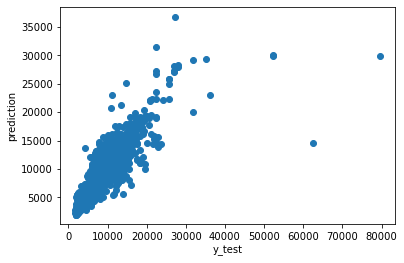

In [98]:
#checking the labels of data for our model
plt.scatter(x=y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('prediction')

the trend is upwards shifting so our model is working

In [100]:
#prediction of the price of ticket
pred

array([ 7872.92,  7635.77,  3873.66, ...,  8158.56, 10907.14, 10268.3 ])

In [101]:
#saving the model
import joblib
joblib.dump(rf,'ticket_price.pkl')

['ticket_price.pkl']